<a href="https://colab.research.google.com/github/achmadbadri/UjiCoba/blob/main/Final_Code_4_18_2021_Dengan_F1_Score_dan_AUC_BCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style
from google.colab import files
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,12,31)
df = web.DataReader("BBCA.JK", 'yahoo', start, end) 

# get 2019 data to test our model on 
start = datetime.datetime(2018,11,13)
end = datetime.datetime(2019,12,31)
test_df = web.DataReader("BBCA.JK", 'yahoo', start, end) 
print(df.shape)
print(test_df.shape)

(1251, 6)
(292, 6)


In [3]:
# Create train set of adj close prices data:
train_data = df.loc[:,'Adj Close'].to_numpy()
print(train_data.shape) # 1258 


# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

(1251,)


In [4]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))

print(X_train.shape)


# Visualizing our data with prints: 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(1215, 36, 1)
X_train:
[[8841.38378906]
 [8570.72753906]
 [8435.40136719]
 [8457.95410156]
 [8412.84667969]
 [8480.51171875]
 [8480.51171875]
 [8841.38378906]
 [8976.71191406]
 [9021.8203125 ]
 [8931.6015625 ]
 [8863.93652344]
 [8886.4921875 ]
 [8931.6015625 ]
 [9202.25878906]
 [9179.70117188]
 [8841.38378906]
 [9021.8203125 ]
 [9021.8203125 ]
 [8954.15722656]
 [8863.93652344]
 [8886.4921875 ]
 [8976.71191406]
 [9157.14746094]
 [9247.36621094]
 [9066.92773438]
 [9157.14746094]
 [9292.47460938]
 [9247.36621094]
 [9360.13769531]
 [9450.35839844]
 [9382.69140625]
 [9247.36621094]
 [9382.69140625]
 [9427.80078125]
 [9382.69140625]]


y_train: [[9360.13769531]]



In [31]:
# Build the model 
model = keras.Sequential()

model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = False))
#model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16,  activation='relu'))
model.add(Dense(units = 1, activation= 'linear'))
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
85/85 [==============================] - 7s 48ms/step - loss: 0.0185 - val_loss: 0.0027
Epoch 2/20
85/85 [==============================] - 3s 39ms/step - loss: 5.4613e-04 - val_loss: 0.0040
Epoch 3/20
85/85 [==============================] - 3s 41ms/step - loss: 4.7477e-04 - val_loss: 0.0010
Epoch 4/20
85/85 [==============================] - 3s 39ms/step - loss: 3.9974e-04 - val_loss: 0.0026
Epoch 5/20
85/85 [==============================] - 3s 39ms/step - loss: 4.0799e-04 - val_loss: 7.3566e-04
Epoch 6/20
85/85 [==============================] - 3s 38ms/step - loss: 3.8670e-04 - val_loss: 0.0017
Epoch 7/20
85/85 [==============================] - 3s 39ms/step - loss: 3.1450e-04 - val_loss: 8.0261e-04
Epoch 8/20
85/85 [==============================] - 3s 39ms/step - loss: 3.5703e-04 - val_loss: 6.9952e-04
Epoch 9/20
85/85 [==============================] - 3s 39ms/step - loss: 3.6480e-04 - val_loss: 6.6570e-04
Epoch 10/20
85/85 [==============================] - 3s 39ms/

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 36, 128)           66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________


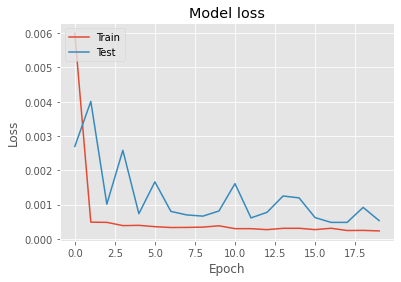

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = test_df['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
true = y_test
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
pred = predicted_y
predicted_y = scaler.inverse_transform(predicted_y)


In [35]:
# MSE
difference_array = np.subtract(true, pred)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE : %.2f" % mean_squared_error(true, pred, squared=False))

# The MAE
print("MAE : %.2f" % mean_absolute_error(true, pred))

#Mean Absolute Percentange Error
MAPE = (np.mean(np.abs((true - pred) / true))) * 100
print('MAPE : ', MAPE)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(true, pred))

MSE : 0.0006175627034177801
RMSE : 0.02
MAE : 0.02
MAPE :  1.6804462764526171
R2 score: 0.95


We choose the mean square error MSE of all samples as our metric. It can be calculated through Eqn. (47) using test set. Notice that the MSE we calculated are derived from normalized data. That's because there exists huge value gap among dierent stocks. if we use original stock price to evaluate error, the error of high price stocks would probably be much more larger than low price ones, which implies models perform better on high price stocks would very likely to have better overall performance. Thus the performance on low price stocks would become dispensable. To avoid the bias caused by the aforementioned problem we evaluate the error with normalized stock price ranged from -1 to 1. (Li, H., Shen, Y., dan Zhu, Y. 2018. Stock Price Prediction Using attention-based Multi-Input LSTM)

In [36]:
predicted_y = pd.DataFrame(predicted_y)
org_y = pd.DataFrame(org_y)
describe = pd.DataFrame()
describe['True Price'] = org_y[0]
describe['Prediction'] = predicted_y[0]
describe['difference'] = org_y[0] - predicted_y[0]
describe['MAPE (%)'] = abs(describe['difference']/org_y[0]*100)
describe.describe()

,True Price,Prediction,difference,MAPE (%)
count,256.000000,256.000000,256.000000,256.000000
mean,28201.570602,28434.171875,-232.593552,1.170394
std,1824.618878,1805.492676,344.260838,0.946588
min,24727.080078,25113.121094,-1734.093750,0.000646
25%,26350.091797,26627.369629,-418.945312,0.528922
50%,28590.111328,28904.070312,-285.922852,1.058663
75%,29637.851562,29849.114258,-54.886719,1.507651
max,32643.193359,32591.023438,1439.851562,6.949407


In [37]:
describe.head(10)

,True Price,Prediction,difference,MAPE (%)
0,25013.494141,25113.121094,-99.626953,0.398293
1,24727.080078,25156.408203,-429.328125,1.736267
2,24846.419922,25143.710938,-297.291016,1.196514
3,25037.361328,25137.097656,-99.736328,0.398350
4,25013.494141,25170.976562,-157.482422,0.629590
5,25085.099609,25209.066406,-123.966797,0.494185
6,25085.099609,25257.591797,-172.492188,0.687628
7,25061.228516,25300.777344,-239.548828,0.955854
8,24822.550781,25328.546875,-505.996094,2.038453
9,25108.966797,25295.259766,-186.292969,0.741938


In [38]:
a = np.array(describe['True Price'])
b = np.array(describe['Prediction'])

# MSE
difference_array = np.subtract(a, b)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
print("RMSE: %.2f" % mean_squared_error(a, b, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(a, b))

#Mean Absolute Percentange Error
c = (np.mean(np.abs((a - b) / a))) * 100
print('MAPE : ', c)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(a, b))



MSE : 172152.33348134166
RMSE: 414.91
MAE: 326.42
MAPE :  1.170393701392066
R2 score: 0.95


In [39]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

38/38 [==============================] - 1s 17ms/step - loss: 3.1465e-04
0.0003146493691019714
8/8 [==============================] - 1s 19ms/step - loss: 6.1756e-04
0.0006175627349875867


In [40]:
print(model.metrics_names)

['loss']


In [41]:
graph  = test_df.drop(test_df.index[0:36])
graph.reset_index(inplace=True)
graph.rename(columns = {'index':'Date'})
graph = graph.drop(columns=['High','Low','Open','Volume','Close'])
graph['Predict_Value'] = predicted_y[0]
graph.head()
graph.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

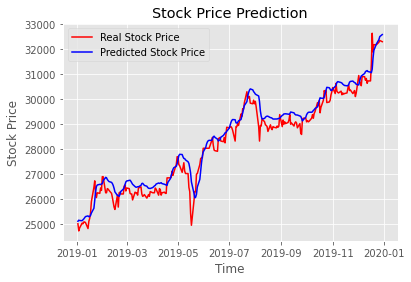

In [42]:
# plot the results 
plt.plot(graph['Adj Close'], color = 'red', label = 'Real Stock Price')
plt.plot(graph['Predict_Value'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(df['Adj Close'], color = 'black', label = 'Past Stock')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [43]:
final  = test_df.drop(test_df.index[0:36])
final.reset_index(inplace=True)
final.rename(columns = {'index':'Date'})
final = final.drop(columns=['High','Low','Open','Volume','Close'])
final['Predict_Value'] = predicted_y[0]
final['Selisih'] = final['Adj Close'] - final['Predict_Value']
final['Lost/Risk (%)'] = abs((final['Adj Close'] - final['Predict_Value'])/final['Predict_Value']*100)
final = final.drop(columns=['Adj Close'])

In [44]:
percent = test_df.drop(test_df.index[0:35])
percent = percent.drop(test_df.index[-1])
percent.reset_index(inplace=True)
percent.rename(columns = {'index':'Date'}) 
percent = percent.drop(columns=['High','Low','Open','Volume','Close'])
percent['Next Day'] = predicted_y
percent['Plus or Minus']= percent['Adj Close'] - percent['Next Day']
percent['Next Day (%)']= abs(((percent['Adj Close'] - percent['Next Day'])/percent['Adj Close'])*100)

In [45]:
True_Next_Day = test_df.drop(test_df.index[0:35])
True_Next_Day = True_Next_Day.drop(test_df.index[-1])
True_Next_Day.reset_index(inplace=True)
True_Next_Day.rename(columns = {'index':'Date'}) 
True_Next_Day = True_Next_Day.drop(columns=['High','Low','Open','Volume','Close'])
True_Next_Day['True Next Day'] = org_y
True_Next_Day['True Plus or Minus']= (True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])
True_Next_Day['True Next Day (%)']= abs(((True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])/True_Next_Day['Adj Close'])*100)
True_Next_Day = True_Next_Day.drop(columns=['Adj Close','True Next Day'])

In [46]:
Concating = percent.merge(final, how='outer', on='Date')
Concating = Concating.merge(True_Next_Day, how='outer', on='Date')
#Concating.set_index('Date', inplace=True)
Final_Predict = Concating.copy()
Final_Predict['Harga Saham Hari ini'] = Concating['Adj Close']
Final_Predict['Prediksi Besok'] = Concating['Plus or Minus']
Final_Predict['Harga Besok Sebenarnya'] = Concating['True Plus or Minus']
Final_Predict['Prediksi Besok (%)'] = (Concating['Next Day (%)'])
Final_Predict['Harga Besok Sebenarnya (%)'] = Concating['True Next Day (%)']
Final_Predict['Selisih Prediksi'] = (Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])
Final_Predict['Risk/MAPE(%)'] = abs(((Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])/Final_Predict['Harga Besok Sebenarnya'])*100)
Final_Predict['Risk/MAPE(%)'] = round(Final_Predict['Risk/MAPE(%)'], 2)
Final_Predict = Final_Predict.drop(columns=['Adj Close', 'Next Day', 'Plus or Minus', 'Next Day (%)',
                                            'Predict_Value', 'Selisih', 'Lost/Risk (%)', 'True Plus or Minus',
                                            'True Next Day (%)'])
Final_Predict = Final_Predict.replace(0, np.nan)
Final_Predict = Final_Predict.dropna()
Final_Predict['Prediksi Uptrend'] = Final_Predict['Prediksi Besok'].apply(lambda x: 1 if x >= 0 else 0)
Final_Predict['Asli Uptrend'] = Final_Predict['Harga Besok Sebenarnya'].apply(lambda x: 1 if x >= 0 else 0)
Final_Predict.set_index('Date', inplace=True)
Final_Predict.shape

(229, 9)

In [47]:
Final_Predict.head()

,Harga Saham Hari ini,Prediksi Besok,Harga Besok Sebenarnya,Prediksi Besok (%),Harga Besok Sebenarnya (%),Selisih Prediksi,Risk/MAPE(%),Prediksi Uptrend,Asli Uptrend
Date,,,,,,,,,
2019-01-01,24822.550781,-290.570312,-190.943359,1.170590,0.769233,99.626953,52.18,0,0
2019-01-02,25013.494141,-142.914062,286.414062,0.571348,1.145038,429.328125,149.90,0,1
2019-01-03,24727.080078,-416.630859,-119.339844,1.684917,0.482628,297.291016,249.11,0,0
2019-01-04,24846.419922,-290.677734,-190.941406,1.169898,0.768487,99.736328,52.23,0,0
2019-01-07,25037.361328,-133.615234,23.867188,0.533663,0.095326,157.482422,659.83,0,1


In [48]:
pred_uptrend = Final_Predict['Prediksi Uptrend']
true_trend = Final_Predict['Asli Uptrend']

# calculate accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(true_trend, pred_uptrend)
print('Accuracy :', Accuracy)


# calculate prediction
from sklearn.metrics import precision_score
precision = precision_score(true_trend, pred_uptrend, average='binary')
print('Precision : %.3f' % precision)

# calculate recall
from sklearn.metrics import recall_score
recall = recall_score(true_trend, pred_uptrend, average='binary')
print('Recall : %.3f' % recall)

# calculate score
from sklearn.metrics import f1_score
score = f1_score(true_trend, pred_uptrend, average='binary')
print('F1 Score : %.3f' % score)

#AUC Score
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(true_trend, pred_uptrend)
print('AUC Score : ', auc)

Accuracy : 0.5240174672489083
Precision : 0.500
Recall : 0.110
F1 Score : 0.180
AUC Score :  0.5050458715596331


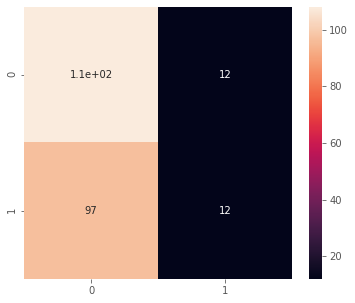

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix(true_trend, pred_uptrend)
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(true_trend, pred_uptrend), annot = True)

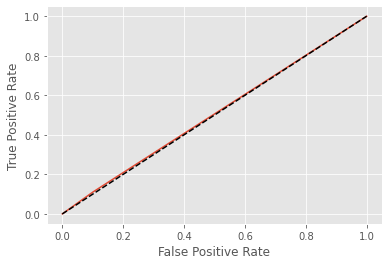

In [50]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(true_trend, pred_uptrend)


import matplotlib.pyplot as plt 
plt.plot(fpr, tpr) 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.plot([0, 1], [0, 1], "k--") 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

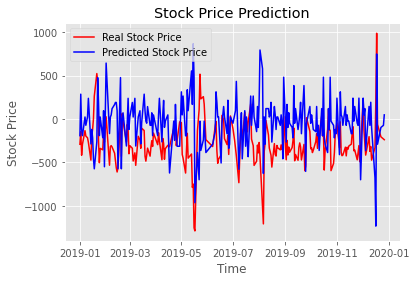

In [51]:
# plot the results 
plt.plot(Final_Predict['Prediksi Besok'], color = 'red', label = 'Real Stock Price')
plt.plot(Final_Predict['Harga Besok Sebenarnya'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(Final_Predict['Risk/MAPE(%)'], color = 'black', label = 'RISK/MAPE(%)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [52]:
#### Mencari Data STAT MODEL

In [53]:
a = X_test
a = np.reshape(a, (-1, 36))
a = scaler.inverse_transform(a)
a = pd.DataFrame(a)

In [54]:
b = y_test
#b = np.reshape(b, (-1, 36))
b = scaler.inverse_transform(b)
b = pd.DataFrame(b)

In [55]:
#OLS Model
import statsmodels.api as sm
X = a
Y = b
X = sm.add_constant(X)
model_ols = sm.OLS(Y,X)
results = model_ols.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.33e-169
Time:                        09:51:06   Log-Likelihood:                -1775.2
No. Observations:                 256   AIC:                             3624.
Df Residuals:                     219   BIC:                             3756.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.9326    270.856      0.358      0.721    -436.886     630.751
0             -0.0425      0.070     -0.605      0.546      -0.181       0.096
1              0.0127      0.095      0.133      0.894      -0.175       0.200
2              0.0921      0.095      0.969      0.334      -0.095       0.279
3              0.0470      0.095      0.493      0.622      -0.141       0.235
4             -0.1529      0.095     -1.617      0.107      -0.339       0.034
5              0.1427      0.094      1.518      0.131      -0.043       0.328
6             -0.1075      0.094     -1.143      0.254      -0.293       0.078
7              0.0609      0.094      0.646      0.519      -0.125       0.246
8             -0.0525      0.094     -0.557      0.578      -0.239       0.133
9              0.0568      0.094      0.602      0.548      -0.129       0.243
10            -0.0114      0.094     -0.121      0.904      -0.198       0.175
11            -0.1102      0.094     -1.177      0.240      -0.295       0.074
12             0.0485      0.094      0.517      0.605      -0.136       0.233
13             0.0761      0.094      0.810      0.419      -0.109       0.261
14            -0.1063      0.095     -1.119      0.264      -0.293       0.081
15             0.1300      0.096      1.355      0.177      -0.059       0.319
16            -0.1117      0.095     -1.172      0.243      -0.300       0.076
17             0.1646      0.095      1.740      0.083      -0.022       0.351
18            -0.0871      0.094     -0.925      0.356      -0.273       0.098
19             0.0165      0.095      0.173      0.863      -0.171       0.204
20            -0.0020      0.096     -0.021      0.983      -0.192       0.188
21            -0.0687      0.097     -0.709      0.479      -0.260       0.122
22             0.1484      0.097      1.533      0.127      -0.042       0.339
23            -0.1227      0.096     -1.273      0.204      -0.313       0.067
24             0.0734      0.096      0.767      0.444      -0.115       0.262
25             0.0278      0.096      0.290      0.772      -0.161       0.216
26            -0.0549      0.097     -0.567      0.571      -0.246       0.136
27            -0.1560      0.099     -1.582      0.115      -0.350       0.038
28             0.1545      0.099      1.561      0.120      -0.041       0.349
29            -0.1007      0.099     -1.022      0.308      -0.295       0.093
30             0.1221      0.093      1.317      0.189      -0.061       0.305
31            -0.0226      0.092     -0.246      0.806      -0.203       0.158
32            -0.0536      0.092     -0.582      0.561      -0.235       0.128
33             0.0865      0.092      0.940      0.348      -0.095       0.268
34            -0.0308      0.092     -0.333      0.739      -0.213       0.151
35